In [4]:
import pandas as pd
import datetime as dt
from datetime import datetime,timedelta
from matplotlib import pyplot

Para la correcta estimación de los valores futuros de venta, anteriormente deberiamos realizar un correcto análisis de los datos obtenidos a lo largo de los cuatro años.

En primer lugar, debemos graficar los datos para poder apreciar si hay estacionariedad o estacionalidad. Respecto a la estacionariedad esta podría ser en media o en varianza. En caso de que haya estacionariedad en media los datos cortarían una linea imaginaria media de los datos de manera reiterada. Para apreciar si hay estacionariedad en varianza deberíamos fijarnos en las fluctuaciones de los datos de manera que la evolución de la serie temporal se encontrase acotada, de manera próxima, por un rango similar en todo su dominio. Como podemos apreciar en el gráfico que se muestra a continuación, no es estacionaria en varianza ya que hay grandes fluctuaciones y pero si en media ya que los datos cortan en una linea imaginaria. 

En segundo lugar, debemos centrarnos en la estacionalidad ya que al tratarse de venta gafas puede que en determinadas etapas del año la venta sea menor o mayor (ejemplo:verano). Como podemos observar, también es estacional ya que hay un incremento de ventas a finales de año (por compras de navidad) y a mediados (por epoca de sol de verano). 


<function matplotlib.pyplot.show(close=None, block=None)>

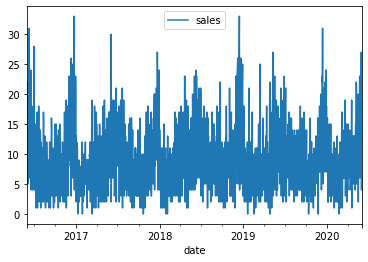

In [5]:
sales_data = pd.read_csv('sales_data.csv',parse_dates=['date'])
sales_data
sales_data.plot(x='date', y='sales')
pyplot.show

También será preciso un correcto análisis de autocorrelación de los datos y de este modo saber que proceso estocástico siguen, si paseo aleatorio o ruido blanco. Esto podremos verlo a través de la función acf() y pacf() integrada en la librería statsmodels.tsa.stattools.

In [12]:
from statsmodels.tsa.stattools import acf,pacf
sales_data = pd.read_csv('sales_data.csv',parse_dates=['date'])
acf(sales_data, col="2", lag= 180)

TypeError: acf() got an unexpected keyword argument 'col'

Una vez hecho el analisis de nuestros datos de venta, llega la hora de ver que modelo de predicción sería necesario utilizar en nuestra función de prediccion. Para ello debemos 

### Current Code:

In [3]:

def forecast_sales(start_date: datetime, end_date: datetime, sales_data: pd.DataFrame):
    """
    Sales estimation function
    Parámeters:
        - start_date (type:date): prediction start date
        - end_date (type:date): prediction end date
        - sales_data (type:dataframe): dataframe of sales_data.csv (data,sales)
    Return: 
    """
    
    
    days_to_forecast = (end_date - start_date).days #días de las ventas que quiero predecir
    mean_daily_sales = sales_data[sales_data['date'] < start_date]['sales'].mean() #media de las ventas anteriores a la fecha de predicción
    return mean_daily_sales * days_to_forecast #total de ventas de los meses que quiero predecir 

In [14]:
def calculate_new_order (order_date: datetime, lead_time_days: int, days_to_next_order: int, 
                         sales_data: pd.DataFrame, current_stock_level: int, stock_in_transit: int):
    """
        - order_date(type:): 
        - lead_time_days(type: int): order delivery date (tiempo de espera del pedido = 90)
        - days_to_next_order(type: int): date of the next order (tiempo para hacer el proximo pedido = 30)
        - sales_data (type:dataframe): dataframe of sales_data.csv (data,sales) 
        - current_stock_level (type:int): current stock
        - stock_in_transit (type:int): stock in transit
    """
    
    arrival_date = order_date + timedelta(days=lead_time_days) #fecha final de llegada
    next_arrival_date = order_date + timedelta(days=days_to_next_order + lead_time_days) #fecha de llegada si hiciesemos otro pedido al mes siguiente
    
    forecast_leadtime = forecast_sales(order_date, arrival_date, sales_data) #ventas desde la fecha del pedido hasta la llegada del pedido
    estimated_stock_at_arrival = current_stock_level - forecast_leadtime + stock_in_transit #stock actual  - ventas estimadas + stock en transito    
    forecast_planning_horizon = forecast_sales(arrival_date,next_arrival_date, sales_data) #ventas estimadas desde el proximo pedido hasta la llegada del proximo pedido
    order = max(0,forecast_planning_horizon - estimated_stock_at_arrival) 
    return order

### Calculate Reordering


In [16]:
order_date = datetime(2020,6,1)
lead_time_days = 90
days_to_next_order = 30
current_stock_level = 400
stock_in_transit = 600

In [17]:
sales_data = pd.read_csv('sales_data.csv',parse_dates=['date'])
sales_data

,date,sales
0,2016-06-01,12
1,2016-06-02,22
2,2016-06-03,19
3,2016-06-04,20
4,2016-06-05,5
...,...,...
1457,2020-05-28,13
1458,2020-05-29,15
1459,2020-05-30,27
1460,2020-05-31,4


In [18]:
calculate_new_order (order_date=order_date, 
                   lead_time_days=lead_time_days, 
                   days_to_next_order=days_to_next_order, 
                   sales_data=sales_data, 
                   current_stock_level=current_stock_level, 
                   stock_in_transit=stock_in_transit)


(186.0598684820378,
 <function __main__.forecast_sales(start_date: datetime.datetime, end_date: datetime.datetime, sales_data: pandas.core.frame.DataFrame)>)